# *IMPORTING USEFUL LIBRARIES*

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# *DATA ANALYSIS*

### *Importing Data*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
read_file = pd.read_excel ("/content/drive/MyDrive/kaggle_dataset/WeldRight Dataset(1).xlsx")
read_file.to_csv ("Test.csv", index = None, header=True)

In [ ]:
data =pd.read_csv("Test.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,2,3,6,7,8,9,10,11,22,27,32,37,42,47,52,57,62,67,72,77,82,87) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data.loc[data['Defect'] == 'No Defect' , 'Defects'] = 'No Defect'
data.loc[data['Defect'] != 'No Defect' , 'Defects'] = 'Defect'

In [ ]:
data.head()

,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,...,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Defects
0,(Office id of employee),(Welding machine name),(Project order number),(This captures the activity to be performed by...,(date of activity),(Timestamp for the activity),(In Ampere),(Relative humidity in %),(in degree celsius),(in liters per min (LPM)),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Defect
1,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:28:527,1.13,74,23,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Defect
2,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:29:40,1.81999999999999,74,23,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Defect
3,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:29:677,2.91,74,23,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Defect
4,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:30:166,0.04,74,23,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Defect


### *Dropping Unwanted Coloumns*

In [ ]:
data.drop([ 'Unnamed: 13','Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51',
       'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55',
       'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59',
       'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63',
       'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67',
       'Unnamed: 68', 'Unnamed: 69', 'Unnamed: 70', 'Unnamed: 71',
       'Unnamed: 72', 'Unnamed: 73', 'Unnamed: 74', 'Unnamed: 75',
       'Unnamed: 76', 'Unnamed: 77', 'Unnamed: 78', 'Unnamed: 79',
       'Unnamed: 80', 'Unnamed: 81', 'Unnamed: 82', 'Unnamed: 83',
       'Unnamed: 84', 'Unnamed: 85', 'Unnamed: 86', 'Unnamed: 87'],axis=1,inplace=True)

In [ ]:
data.drop(0,axis=0,inplace=True)

In [ ]:
data.head()

,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,Defects
1,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:28:527,1.13,74,23,0.01,29.3,15.2,No Defect,No Defect
2,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:29:40,1.81999999999999,74,23,0,29.3,0,Tungsten Inclusion,Defect
3,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:29:677,2.91,74,23,0,29.3,0,No Defect,No Defect
4,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:30:166,0.04,74,23,0,29.3,0,No Defect,No Defect
5,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:30:696,2.51,74,23,0,27.8,0,No Defect,No Defect


### *Converting Relevant Data Types to float*

In [ ]:
data.dtypes

Employee Code         object
Machine               object
Production            object
Order Operation No    object
Date                  object
Time                  object
Current               object
Humidity              object
Temperature           object
Flow                  object
Job Temp              object
Voltage               object
Defect                object
Defects               object
dtype: object

In [ ]:
data['Temperature'] = data['Temperature'].astype('float')
data['Current'] = data['Current'].astype('float')
data['Humidity'] = data['Humidity'].astype('float')
data['Flow'] = data['Flow'].astype('float')
data['Job Temp'] = data['Job Temp'].astype('float')
data['Voltage'] = data['Voltage'].astype('float')

In [ ]:
data.dtypes

Employee Code          object
Machine                object
Production             object
Order Operation No     object
Date                   object
Time                   object
Current               float64
Humidity              float64
Temperature           float64
Flow                  float64
Job Temp              float64
Voltage               float64
Defect                 object
Defects                object
dtype: object

### *Getting insight From Data and Manipulating it*

In [ ]:
data.head()

,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,Defects
1,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:28:527,1.13,74.0,23.0,0.01,29.3,15.2,No Defect,No Defect
2,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:29:40,1.82,74.0,23.0,0.00,29.3,0.0,Tungsten Inclusion,Defect
3,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:29:677,2.91,74.0,23.0,0.00,29.3,0.0,No Defect,No Defect
4,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:30:166,0.04,74.0,23.0,0.00,29.3,0.0,No Defect,No Defect
5,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:30:696,2.51,74.0,23.0,0.00,27.8,0.0,No Defect,No Defect


In [ ]:
print(data['Machine'].unique())

['TWLD23']


In [ ]:
# Here ,it is seen that same type of machine has been used so , no relevance of 'Machine' coloumn here
# Hence we are dropping this particular coloumn
data.drop(['Machine'] ,axis = 1 ,inplace = True)

In [ ]:
# Production is also project under order 
# Hence this coloumn is also not required
data.drop(['Production'] ,axis = 1 ,inplace = True)


In [ ]:
#
data.drop(['Order Operation No'] ,axis = 1 ,inplace = True)


In [ ]:
data.drop(['Defect'] ,axis = 1 ,inplace = True)

In [ ]:
#
data.drop(['Date','Time'] ,axis = 1 ,inplace = True)

In [ ]:
data.head()

,Employee Code,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defects
1,382617,1.13,74.0,23.0,0.01,29.3,15.2,No Defect
2,382617,1.82,74.0,23.0,0.00,29.3,0.0,Defect
3,382617,2.91,74.0,23.0,0.00,29.3,0.0,No Defect
4,382617,0.04,74.0,23.0,0.00,29.3,0.0,No Defect
5,382617,2.51,74.0,23.0,0.00,27.8,0.0,No Defect


In [ ]:
data['Defects'].value_counts()

No Defect    819552
Defect         7982
Name: Defects, dtype: int64

# *LABEL ENCODING (Defects Coloumn)*

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['Defects']= label_encoder.fit_transform(data['Defects'])

data['Defects'].value_counts()

## No Defect == "1" && Defect == "0"

1    819552
0      7982
Name: Defects, dtype: int64


























### *EMPLOYEE ANALYSIS*

In [ ]:
data['Employee Code'] = data['Employee Code'].astype('str')

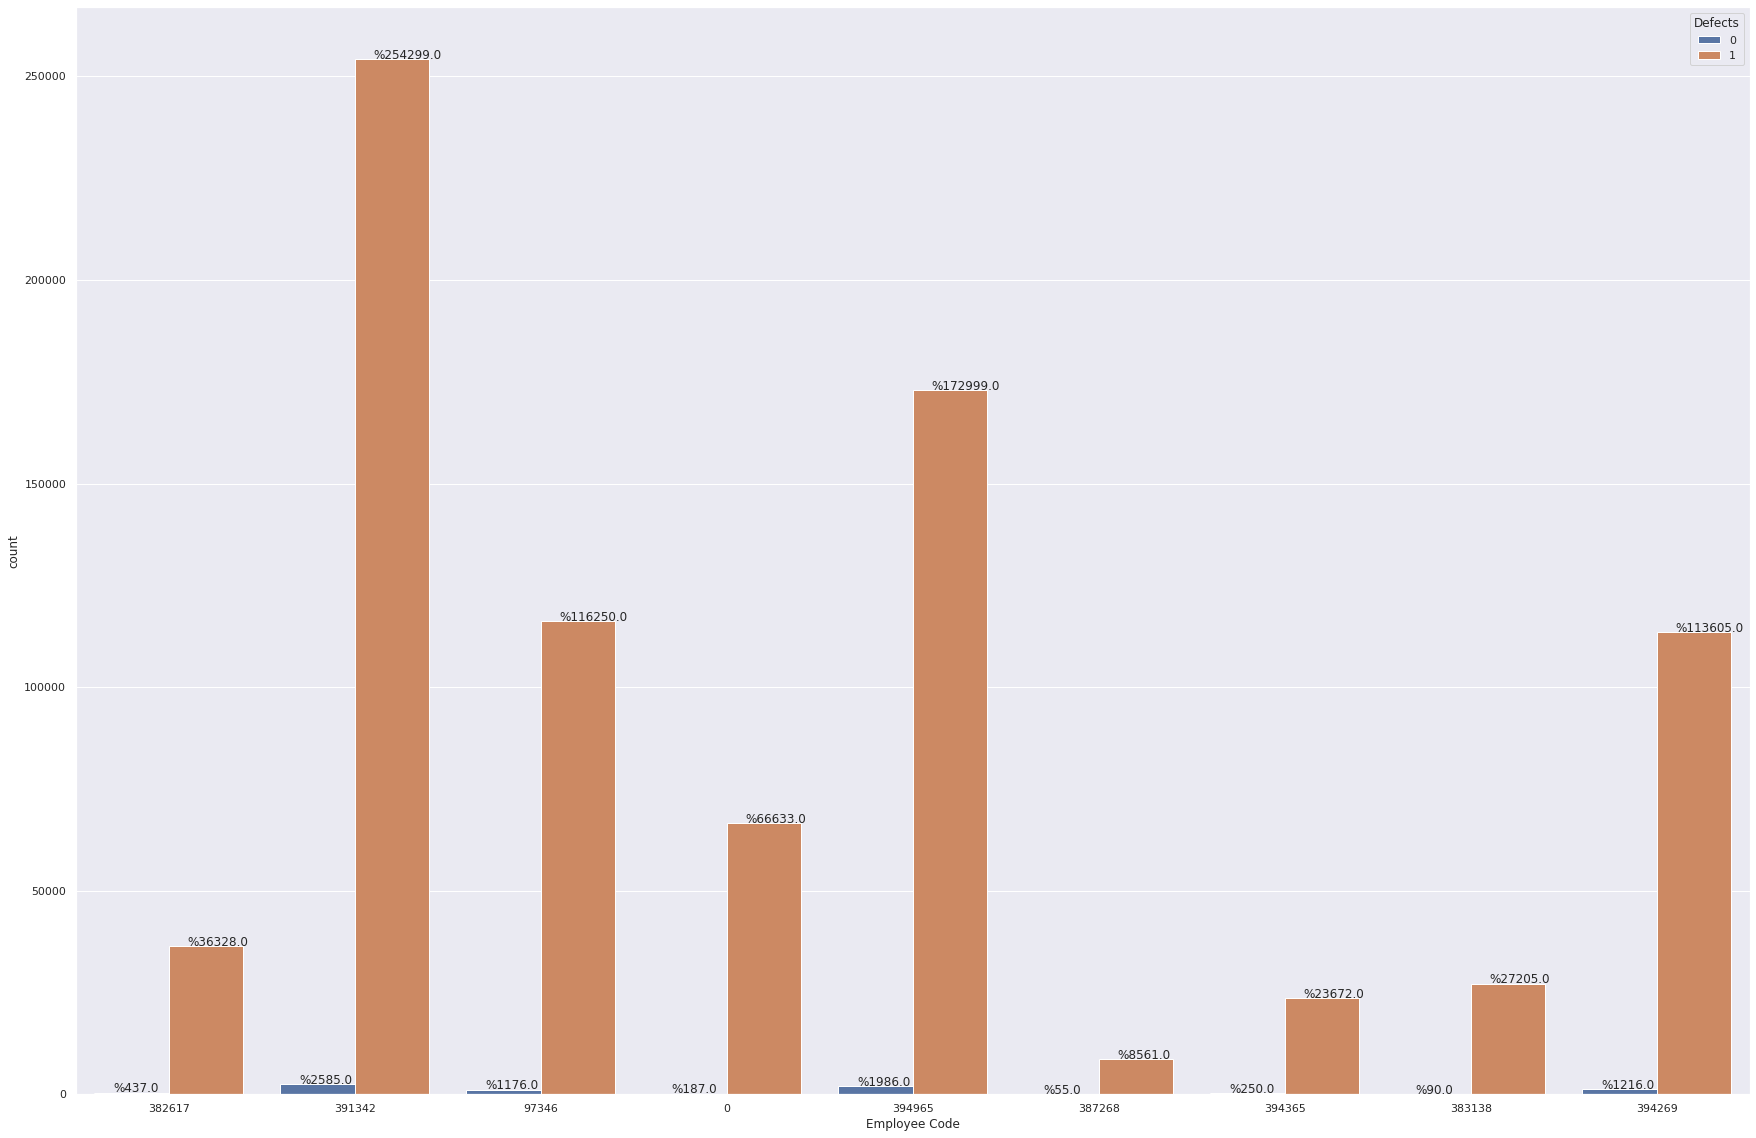

In [ ]:
sns.set(rc = {'figure.figsize' : (30,20)})
ax = sns.countplot(data=data, x="Employee Code", hue="Defects")
for p in ax.patches:
        ax.annotate('%{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Employee ID 	      Non Defect	Defect	  %Defects
382617	                36400	    365	       0.992792058
391342	                255031	    1853	   0.721337257
97346	                116565	     861       0.733227735
0	                     66740	      80	   0.119724633
394965	                 173466	    1519	   0.868074406
394365	                 23740	     182	   0.760805953
383138	                 27239	      56	   0.205165781
394269	                 114008	     813	   0.70805863

The performance of employee having employee ID:0 is best among all 9 employee.
Employee ID: 383138 comes at 2nd position.
Employee ID: 382617 is has produced the highest percentage of defected products.

In [ ]:
data.drop(['Employee Code'] ,axis = 1 ,inplace = True)

# *HANDLING MISSING VALUES*

In [ ]:
data.isnull().sum()

Current        3
Humidity       0
Temperature    0
Flow           0
Job Temp       0
Voltage        0
Defects        0
dtype: int64

In [ ]:
# Replacing missing Current value with its mean
data['Current'].fillna(int(data['Current'].mean()), inplace=True)

In [ ]:
data.isnull().sum()

Current        0
Humidity       0
Temperature    0
Flow           0
Job Temp       0
Voltage        0
Defects        0
dtype: int64

In [ ]:
# stastical analysis of every coloumn
data.describe()

,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defects
count,827534.000000,827534.000000,827534.000000,827534.000000,827534.000000,827534.000000,827534.000000
mean,8.673908,74.956373,23.884997,1.763230,136.406572,2.846528,0.990354
std,13.219328,10.374707,3.491204,1.741196,558.122529,4.616725,0.097737
min,-2.000000,0.000000,-13.000000,0.000000,0.000000,-2.578000,0.000000
25%,0.260000,72.000000,24.000000,0.000000,29.800000,0.000000,1.000000
50%,2.250000,76.000000,24.000000,1.600000,31.300000,0.000000,1.000000
75%,13.677500,79.000000,25.000000,3.140000,35.600000,8.660000,1.000000
max,163.000000,2444.000000,828.000000,14.470000,3276.700000,24.499000,1.000000


## *PEARSON'S CORRELATION*

In [ ]:
x = data.corr()
x

,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defects
Current,1.000000,-0.011689,-0.009614,0.089914,0.017546,0.705117,-0.061860
Humidity,-0.011689,1.000000,0.707087,-0.029554,-0.074149,-0.074754,0.017187
Temperature,-0.009614,0.707087,1.000000,-0.005525,-0.035515,-0.032865,0.007575
Flow,0.089914,-0.029554,-0.005525,1.000000,0.138386,0.137254,0.003218
Job Temp,0.017546,-0.074149,-0.035515,0.138386,1.000000,0.054911,-0.016184
Voltage,0.705117,-0.074754,-0.032865,0.137254,0.054911,1.000000,-0.059863
Defects,-0.061860,0.017187,0.007575,0.003218,-0.016184,-0.059863,1.000000


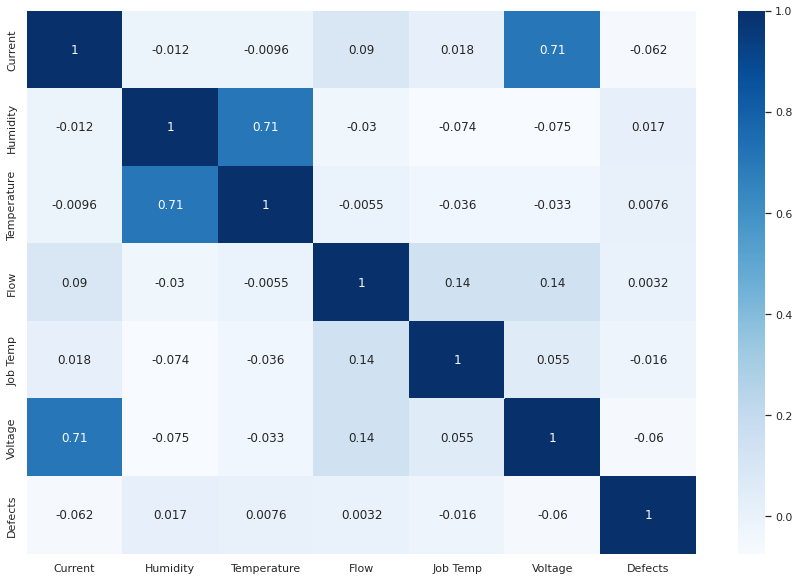

In [ ]:
sns.set(rc = {'figure.figsize' : (15,10)})
dataplot = sns.heatmap(x,cmap ="Blues", annot=True)

#### *NOTE: It can be seen from above heatmap that temperature and humidity are highly correlated and same goes for current and voltage*

## *KENDALL CORRELATION*

In [ ]:
from scipy.stats import kendalltau

In [ ]:
y = data.corr(method='kendall')
y

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defects
Current,1.000000,0.072545,0.034467,0.028312,-0.009318,0.488805,-0.045762
Humidity,0.072545,1.000000,0.100859,-0.065219,-0.213371,-0.056530,0.012245
Temperature,0.034467,0.100859,1.000000,0.036138,0.189598,0.009569,0.003389
Flow,0.028312,-0.065219,0.036138,1.000000,0.095686,0.113371,0.001690
Job Temp,-0.009318,-0.213371,0.189598,0.095686,1.000000,0.107673,-0.021156
Voltage,0.488805,-0.056530,0.009569,0.113371,0.107673,1.000000,-0.064081
Defects,-0.045762,0.012245,0.003389,0.001690,-0.021156,-0.064081,1.000000


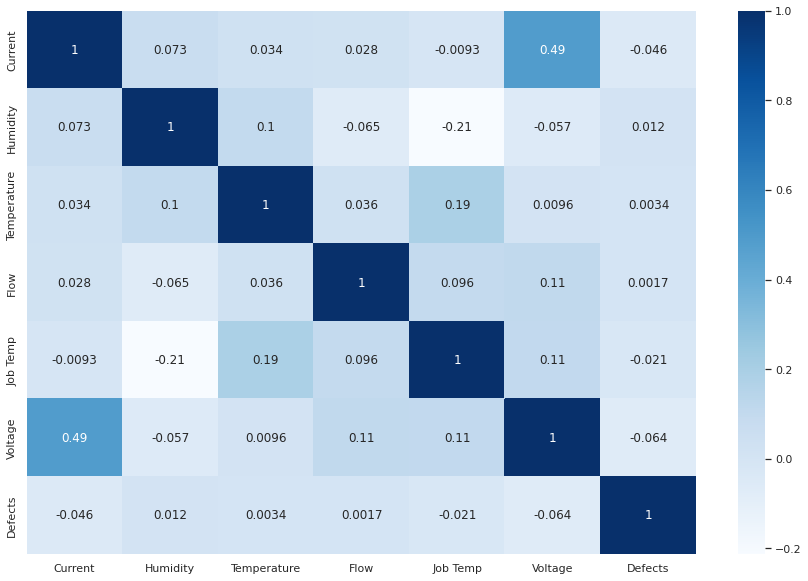

In [ ]:
sns.set(rc = {'figure.figsize' : (15,10)})
dataplot = sns.heatmap(y,cmap ="Blues", annot=True)

### *Temperature and Defects*

In [ ]:
tau, p_value = stats.kendalltau(data['Temperature'], data['Defects'])
print(f"Kendall Rank correlation:%.5f" %tau)
print(f"P VALUE: %.5f" %p_value)

Kendall Rank correlation:0.00339
P VALUE: 0.00078


/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


### *Current and Defects*

In [ ]:
tau, p_value = stats.kendalltau(data['Current'], data['Defects'])
print(f"Kendall Rank correlation:%.5f" %tau)
print(f"P VALUE: %.5f" %p_value)

Kendall Rank correlation:-0.04576
P VALUE: 0.00000


### *Humidity and Defects*

In [ ]:
tau, p_value = stats.kendalltau(data['Humidity'], data['Defects'])
print(f"Kendall Rank correlation:%.5f" %tau)
print(f"P VALUE: %.5f" %p_value)

Kendall Rank correlation:0.01225
P VALUE: 0.00000


### *Flow and Defects*

In [ ]:
tau, p_value = stats.kendalltau(data['Flow'], data['Defects'])
print(f"Kendall Rank correlation:%.5f" %tau)
print(f"P VALUE: %.5f" %p_value)

Kendall Rank correlation:0.00169
P VALUE: 0.06942


### *Job Temp and Defects*

In [ ]:
tau, p_value = stats.kendalltau(data['Job Temp'], data['Defects'])
print(f"Kendall Rank correlation:%.5f" %tau)
print(f"P VALUE: %.5f" %p_value)

Kendall Rank correlation:-0.02116
P VALUE: 0.00000


### *Voltage and Defects*

In [ ]:
tau, p_value = stats.kendalltau(data['Voltage'], data['Defects'])
print(f"Kendall Rank correlation:%.5f" %tau)
print(f"P VALUE: %.5f" %p_value)

Kendall Rank correlation:-0.06408
P VALUE: 0.00000


## *BOX-PLOTS AND OUTLIERS ANALYSIS*

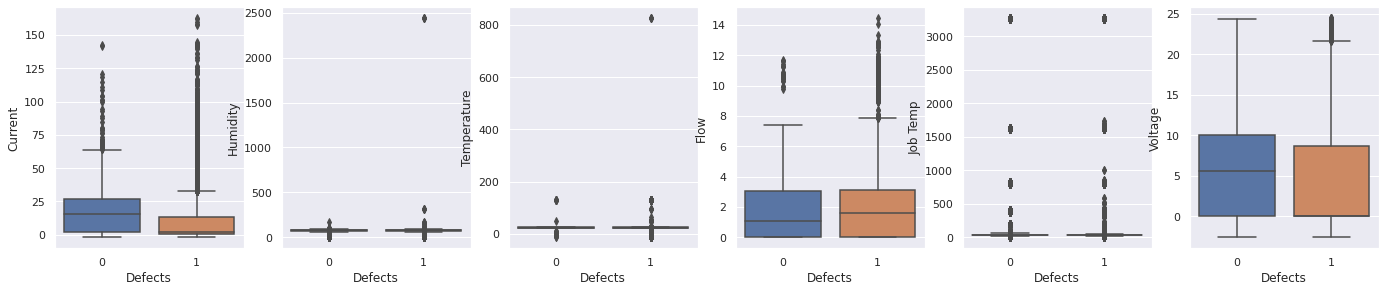

In [ ]:
plt.figure(figsize=(40,40))
plt.subplots_adjust(hspace=1)
i=1
for col_name in data.drop(columns=["Defects"],axis=1).columns:
    plt.subplot(5,10, i)
    sns.boxplot(data=data, x='Defects', y=col_name)
    i+=1

In [ ]:
# we are visualizing Outliers in 'Current' , 'Humidity' ,'Temperature','Flow','Job Temp','Voltage'
data.Current.describe()

count    827534.000000
mean          8.673908
std          13.219328
min          -2.000000
25%           0.260000
50%           2.250000
75%          13.677500
max         163.000000
Name: Current, dtype: float64

In [ ]:
 first_quartile_C = data["Current"].quantile(.99)

In [ ]:
 first_quartile_C

50.48

In [ ]:
first_quartile_H = data["Humidity"].quantile(.99)

In [ ]:
 first_quartile_H

86.0

In [ ]:
first_quartile_T = data["Temperature"].quantile(.99)

In [ ]:
first_quartile_T

26.0

In [ ]:
first_quartile_V = data["Voltage"].quantile(.99)

In [ ]:
first_quartile_V

14.001340000000084

In [ ]:
first_quartile_JT = data["Job Temp"].quantile(.98)

In [ ]:
first_quartile_JT

3274.3

In [ ]:
first_quartile_F = data["Flow"].quantile(.99)

In [ ]:
first_quartile_F

6.44

In [ ]:
data["Defects"].value_counts()

1    819552
0      7982
Name: Defects, dtype: int64

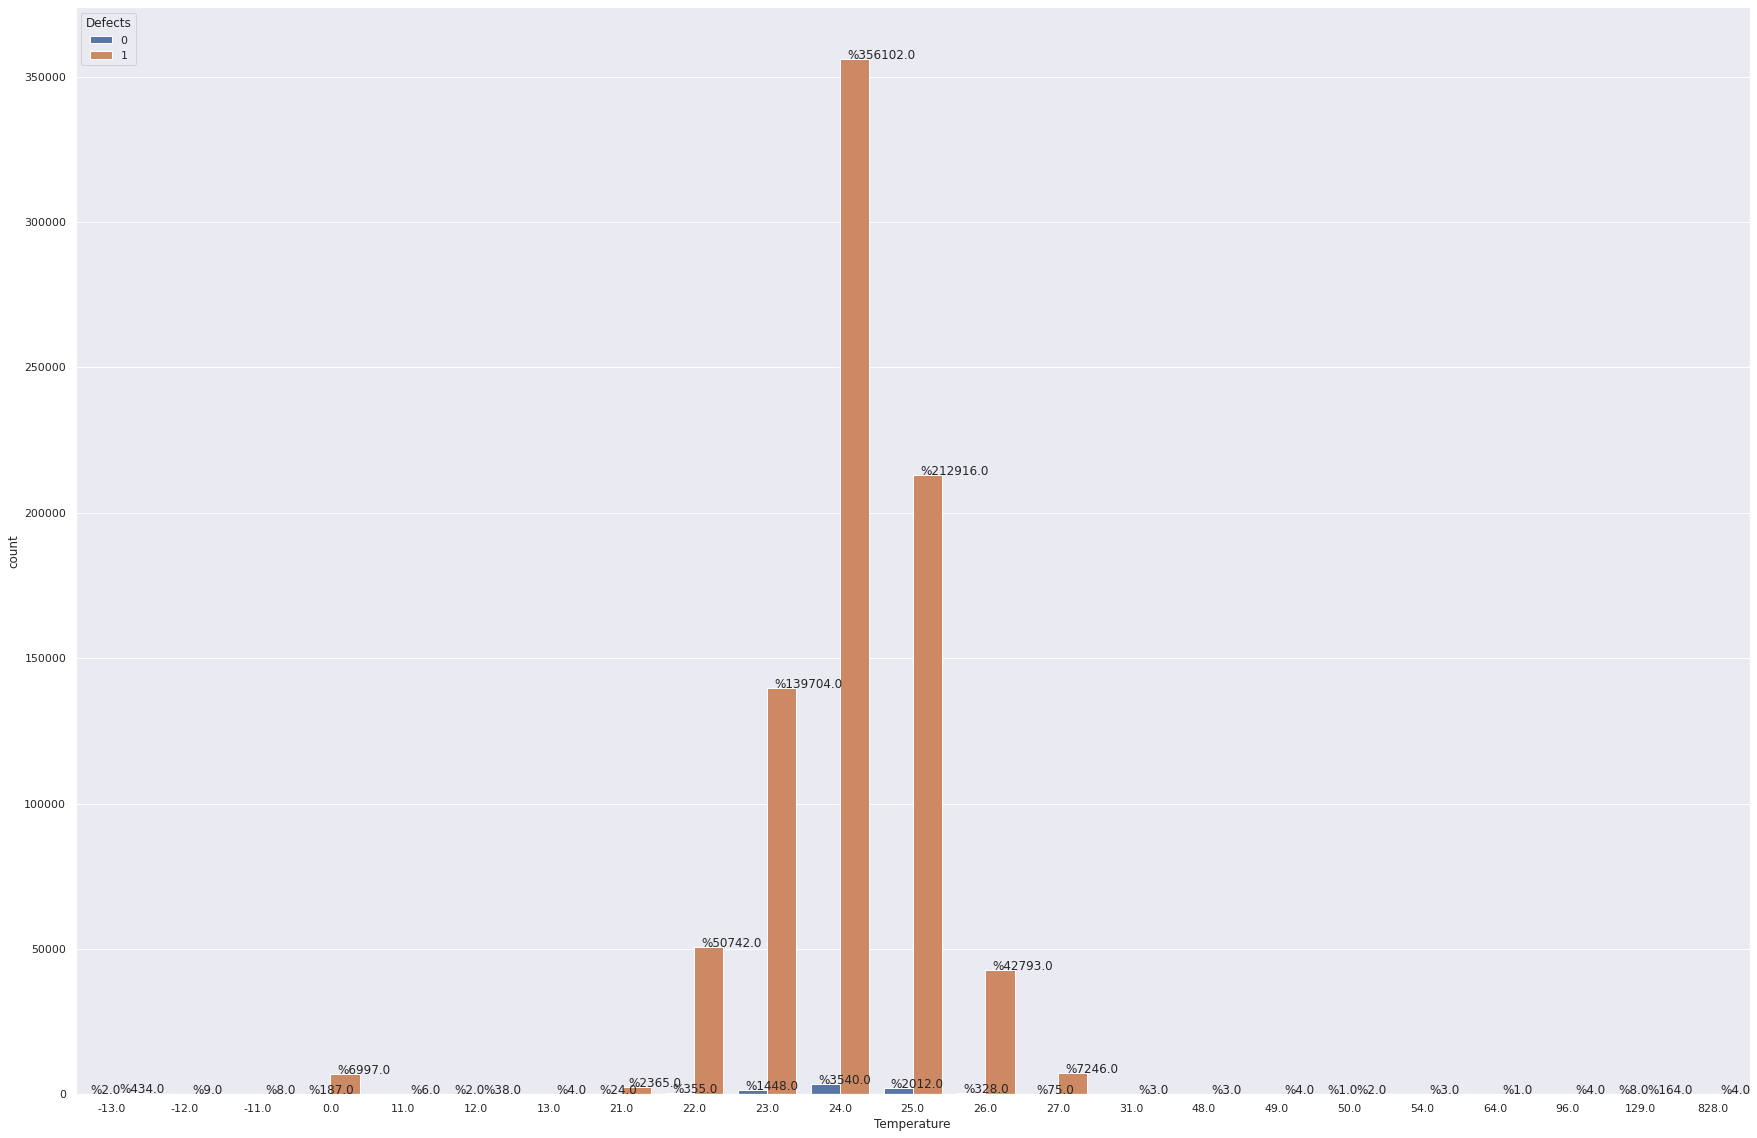

In [ ]:
sns.set(rc = {'figure.figsize' : (30,20)})
ax = sns.countplot(data=data, x="Temperature", hue="Defects")
for p in ax.patches:
        ax.annotate('%{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

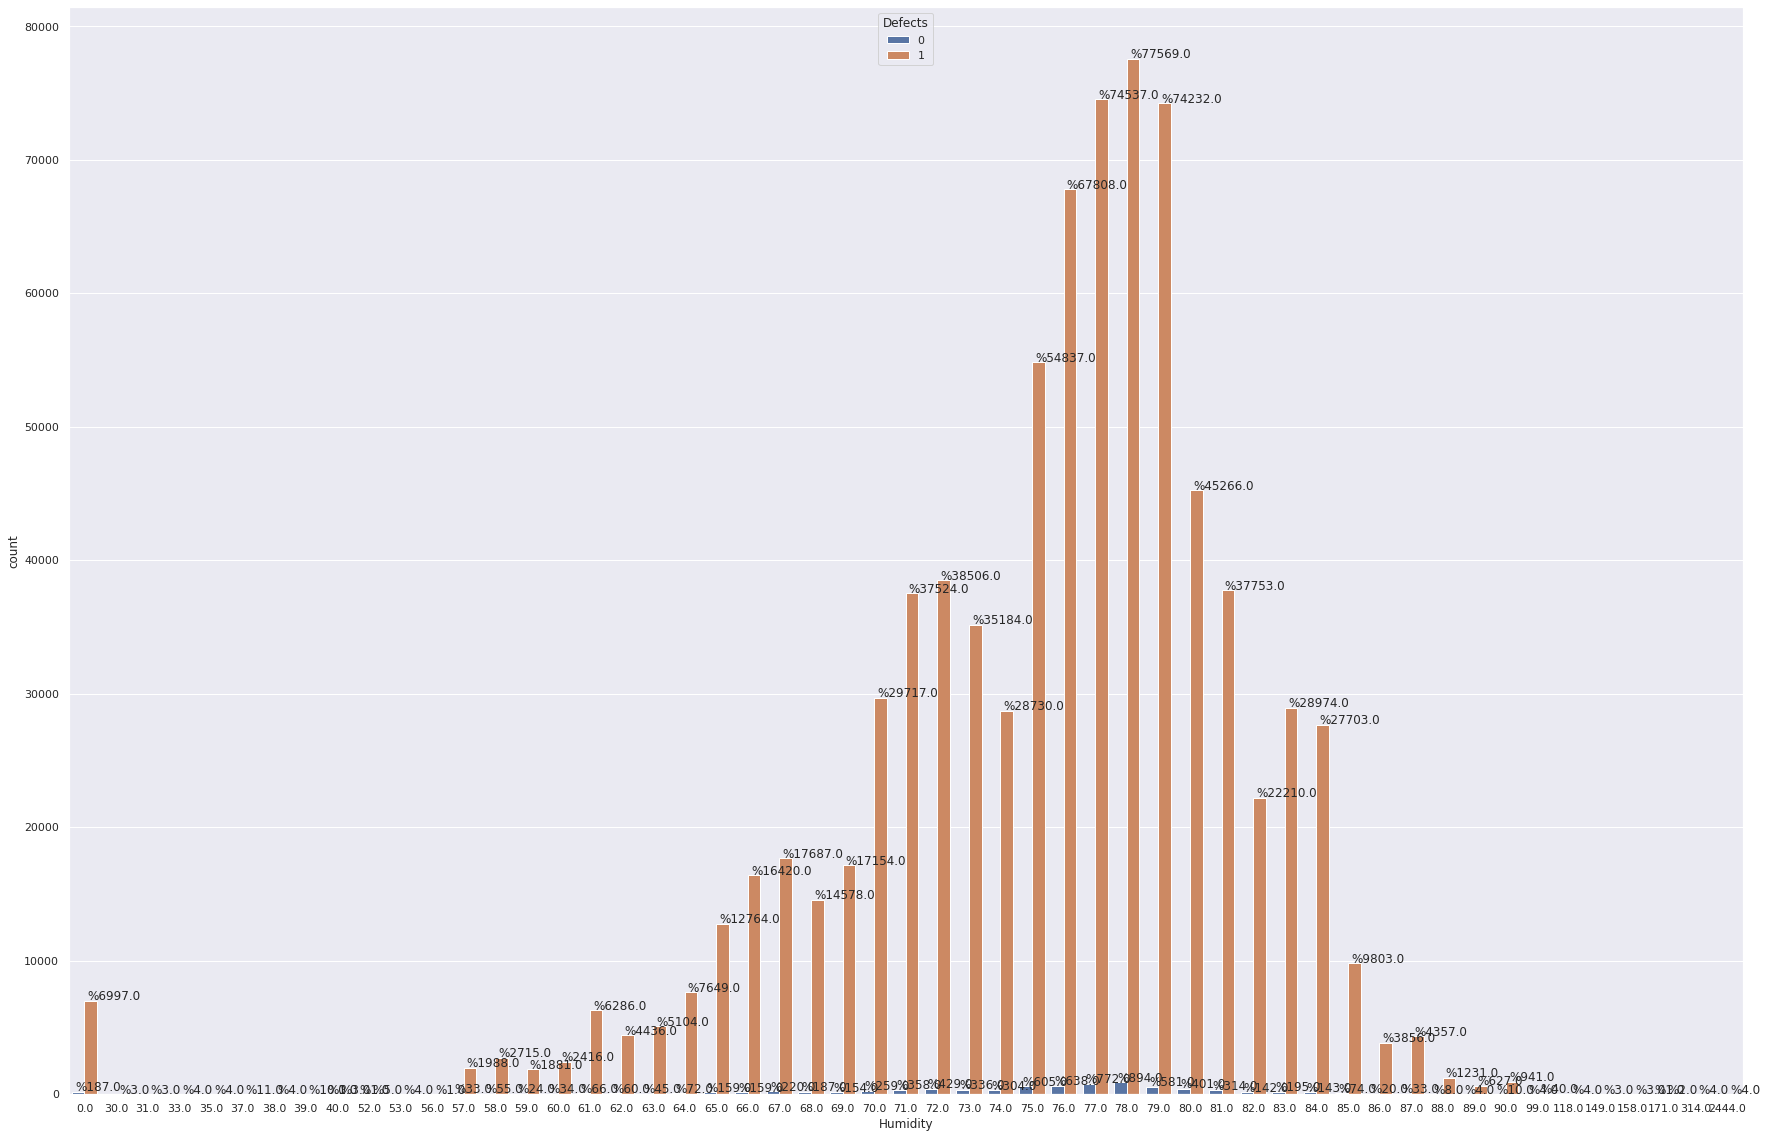

In [ ]:
sns.set(rc = {'figure.figsize' : (30,20)})
ax = sns.countplot(data=data, x="Humidity", hue="Defects")
for p in ax.patches:
        ax.annotate('%{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

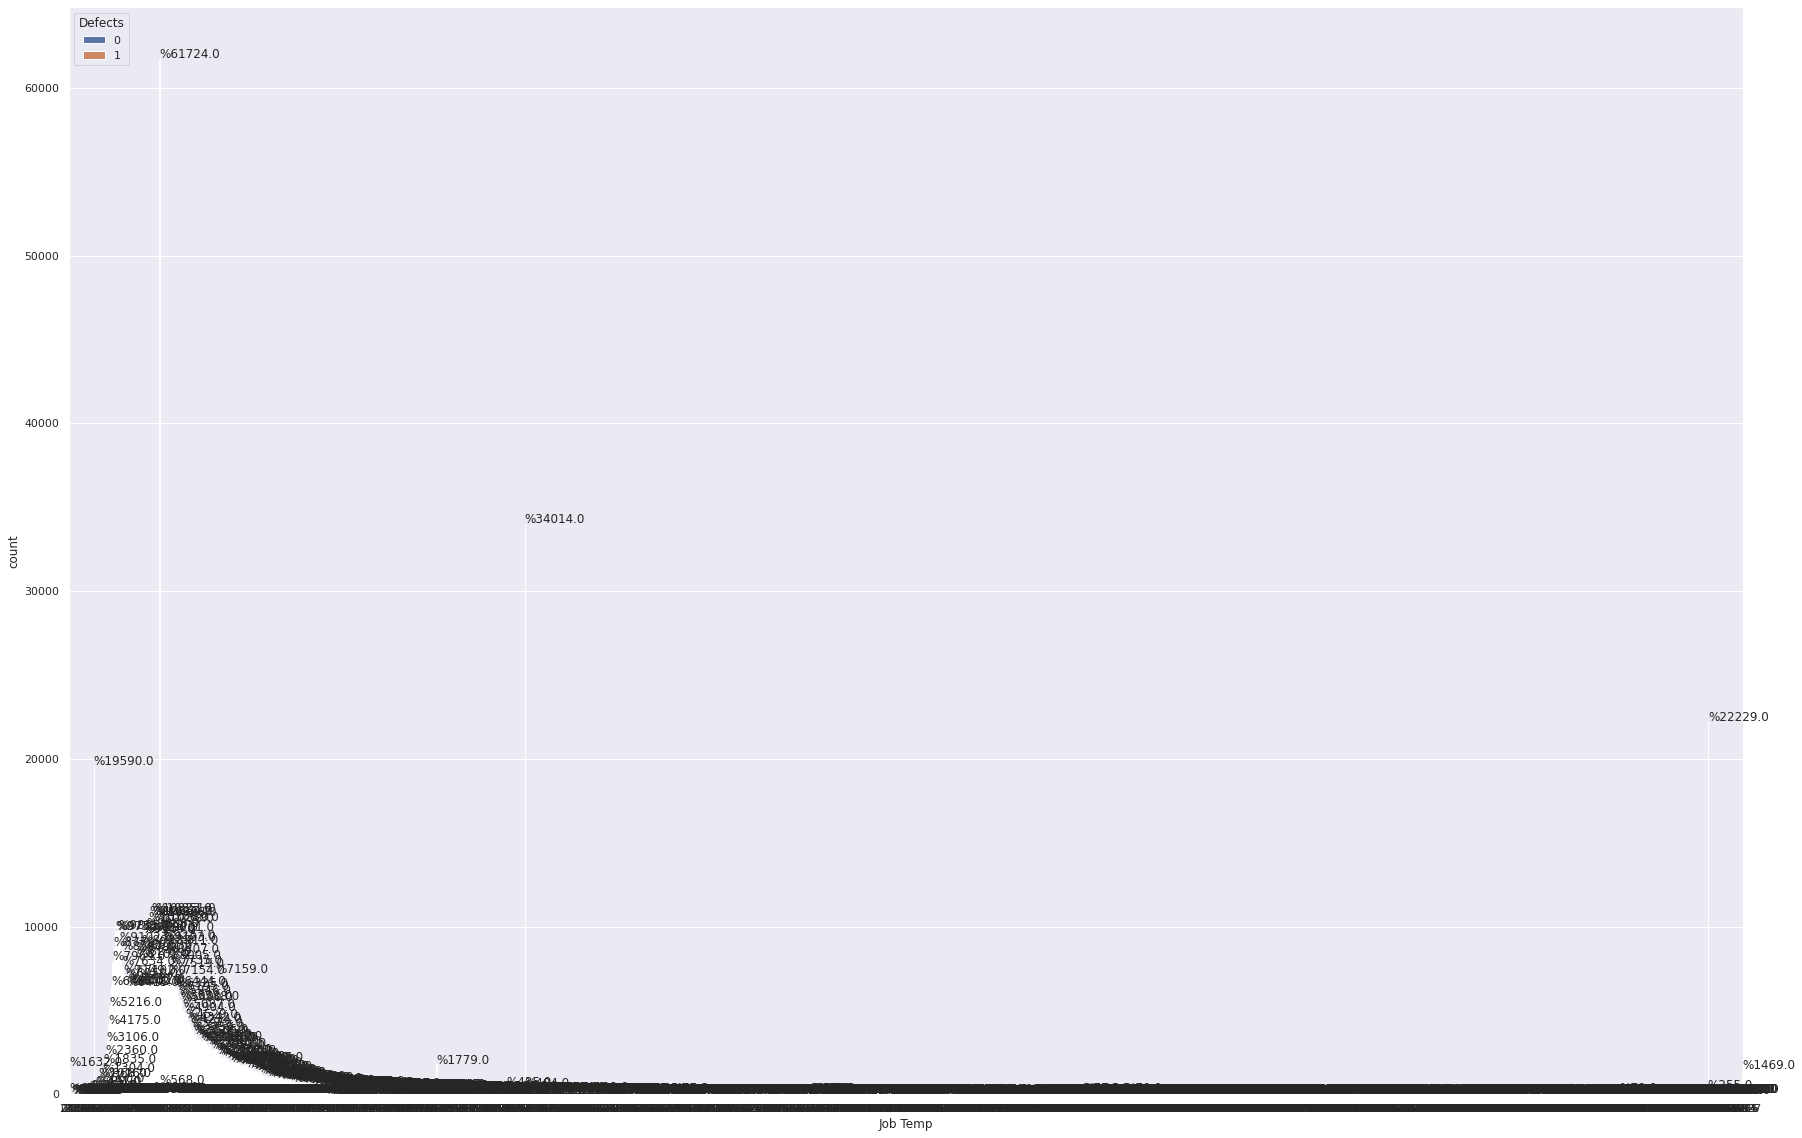

In [ ]:
sns.set(rc = {'figure.figsize' : (30,20)})
ax = sns.countplot(data=data, x="Job Temp", hue="Defects")
for p in ax.patches:
        ax.annotate('%{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

# *DATA MODELLING*

## *Train Test Split*

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(['Defects'],axis=1)
y = data['Defects']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, shuffle=True)

In [ ]:
y

1         1
2         0
3         1
4         1
5         1
         ..
827530    1
827531    1
827532    1
827533    1
827534    1
Name: Defects, Length: 827534, dtype: int64

In [ ]:
# importing modules
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold

# metric 
from sklearn.metrics import confusion_matrix, classification_report

## *Standardization*

In [ ]:
# importing libraries
from sklearn.preprocessing import StandardScaler, QuantileTransformer, RobustScaler

# Standard Scalar 
sscaler = StandardScaler()
X_train_ss = sscaler.fit_transform(X_train)
X_test_ss = sscaler.transform(X_test)

# Quantile Transformer 
qscaler = QuantileTransformer(n_quantiles=100, random_state=43, output_distribution='normal')
X_train_qf = qscaler.fit_transform(X_train)
X_test_qf = qscaler.transform(X_test)

# Robust Scalar
rscaler = RobustScaler(with_scaling=True)
X_train_rs = rscaler.fit_transform(X_train)
X_test_rs = rscaler.transform(X_test)

## *Fitting Models on both real data and SMOTE generated data*

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

print("Accuracy is",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy is 99.03025249687325
Confusion Matrix
[[     0   1605]
 [     0 163902]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
## Standard Scaler
from sklearn.metrics import confusion_matrix, accuracy_score
logistic_model = LogisticRegression()
logistic_model.fit(X_train_ss, y_train)
y_pred = logistic_model.predict(X_test_ss)

accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

print("Accuracy is",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy is 99.03025249687325
Confusion Matrix
[[     0   1605]
 [     0 163902]]


In [ ]:
## Quantile Scaler
from sklearn.metrics import confusion_matrix, accuracy_score
logistic_model = LogisticRegression()
logistic_model.fit(X_train_qf, y_train)
y_pred = logistic_model.predict(X_test_qf)

accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

print("Accuracy is",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy is 99.03025249687325
Confusion Matrix
[[     0   1605]
 [     0 163902]]


In [ ]:
## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test,y_pred)*100
print("Accuracy is",accuracy)

[[   255   1350]
 [  1577 162325]]
              precision    recall  f1-score   support

           0       0.14      0.16      0.15      1605
           1       0.99      0.99      0.99    163902

    accuracy                           0.98    165507
   macro avg       0.57      0.57      0.57    165507
weighted avg       0.98      0.98      0.98    165507

Accuracy is 98.23149474040372


## *UPSAMPLING DATA TO PREVENT OVERFITTING*

In [ ]:
# Using Imblearn
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE
smote  = SMOTE()

In [ ]:
X_train_smote,y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)

In [ ]:
from collections import Counter
print("Before smote :",Counter(y_train))
print("After smote :",Counter(y_train_smote))

Before smote : Counter({1: 655650, 0: 6377})
After smote : Counter({1: 655650, 0: 655650})


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
logistic_model = LogisticRegression()
logistic_model.fit(X_train_smote, y_train_smote)
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

print("Accuracy is",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy is 70.21938649120581
Confusion Matrix
[[   954    651]
 [ 48638 115264]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_smote, y_train_smote)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test,y_pred)*100
print("Accuracy is",accuracy)

[[   353   1252]
 [  3959 159943]]
              precision    recall  f1-score   support

           0       0.08      0.22      0.12      1605
           1       0.99      0.98      0.98    163902

    accuracy                           0.97    165507
   macro avg       0.54      0.60      0.55    165507
weighted avg       0.98      0.97      0.98    165507

Accuracy is 96.85149268610995


In [ ]:
# Random Forest Classifier

In [ ]:
# without upsampling
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=1)
random_forest.fit(X_train, y_train)
from sklearn.metrics import accuracy_score

y_predict = random_forest.predict(X_test)
accuracy_score(y_test, y_predict)

0.9911604947222776

In [ ]:
# with upsampling
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=1)
random_forest.fit(X_train_smote, y_train_smote)
from sklearn.metrics import accuracy_score

y_predict = random_forest.predict(X_test)
accuracy_score(y_test, y_predict)

0.8970738397771696

In [ ]:
## Gradient Boosting

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# without upsampling
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.990
Accuracy score (validation): 0.990
Learning rate:  0.075
Accuracy score (training): 0.990
Accuracy score (validation): 0.990
Learning rate:  0.1
Accuracy score (training): 0.990
Accuracy score (validation): 0.990
Learning rate:  0.25
Accuracy score (training): 0.990
Accuracy score (validation): 0.990
Learning rate:  0.5
Accuracy score (training): 0.990
Accuracy score (validation): 0.990
Learning rate:  0.75
Accuracy score (training): 0.990
Accuracy score (validation): 0.990
Learning rate:  1
Accuracy score (training): 0.991
Accuracy score (validation): 0.991


In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[    16   1589]
 [    13 163889]]
Classification Report
              precision    recall  f1-score   support

           0       0.55      0.01      0.02      1605
           1       0.99      1.00      1.00    163902

    accuracy                           0.99    165507
   macro avg       0.77      0.50      0.51    165507
weighted avg       0.99      0.99      0.99    165507



In [ ]:
# with upsampling
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train_smote, y_train_smote)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.718
Accuracy score (validation): 0.719
Learning rate:  0.075
Accuracy score (training): 0.720
Accuracy score (validation): 0.720
Learning rate:  0.1
Accuracy score (training): 0.721
Accuracy score (validation): 0.722
Learning rate:  0.25
Accuracy score (training): 0.768
Accuracy score (validation): 0.770
Learning rate:  0.5
Accuracy score (training): 0.839
Accuracy score (validation): 0.840
Learning rate:  0.75
Accuracy score (training): 0.827
Accuracy score (validation): 0.828
Learning rate:  1
Accuracy score (training): 0.851
Accuracy score (validation): 0.852


In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train_smote, y_train_smote)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[   877    728]
 [ 25741 138161]]
Classification Report
              precision    recall  f1-score   support

           0       0.03      0.55      0.06      1605
           1       0.99      0.84      0.91    163902

    accuracy                           0.84    165507
   macro avg       0.51      0.69      0.49    165507
weighted avg       0.99      0.84      0.90    165507



In [ ]:
## XG BOOST

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# without upsampling
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
score = xgb_clf.score(X_test, y_test)
print(score)

0.9912813355326361


In [ ]:
# with upsampling
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_smote, y_train_smote)
score = xgb_clf.score(X_test, y_test)
print(score)

0.817753931857867


In [ ]:
 X_train_smote

,Current,Humidity,Temperature,Flow,Job Temp,Voltage
0,5.480000,66.000000,26.000000,0.000000,34.000000,10.183000
1,4.310000,78.000000,24.000000,0.000000,29.600000,0.000000
2,-1.220000,82.000000,25.000000,0.970000,31.200000,0.000000
3,24.980000,77.000000,24.000000,0.000000,42.600000,10.282000
4,3.100000,79.000000,24.000000,0.060000,29.100000,0.000000
...,...,...,...,...,...,...
1311295,22.902727,85.000000,25.000000,2.757182,30.670302,11.075891
1311296,-0.050161,78.074598,23.000000,3.720322,29.014920,0.000000
1311297,32.145317,78.707990,23.853995,0.000000,32.014601,-0.321348
1311298,24.500686,79.000000,24.000000,4.841601,30.800000,9.982183
